In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
import matplotlib.dates as mdates


In [107]:
def draw_bar(ax, start, end):
    ax.axvspan(start, end, color='red', alpha=0.3)

def draw_red_arrow(ax, start, end):
    arrow_x = start + (end - start) / 2
    ylim = ax.get_ylim()
    arrow_y = ylim[1] + (ylim[1] - ylim[0]) * 0.05
    ax.annotate('', xy=(arrow_x, ylim[1]), xytext=(arrow_x, arrow_y),
                arrowprops=dict(facecolor='red', shrink=0.05, width=4, headwidth=10),
                annotation_clip=False)

In [108]:
def decimal_year_to_datetime(decimal_year):
    year = int(decimal_year)
    start_of_year = datetime(year, 1, 1)
    # Handle leap years
    days_in_year = 366 if (datetime(year, 12, 31) - datetime(year, 1, 1)).days == 365 else 365
    fraction = decimal_year - year
    return start_of_year + timedelta(days=fraction * days_in_year)

/var/folders/z3/3cfhh53113v2gvks_21cwb080000gn/T/ipykernel_9087/1788033020.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


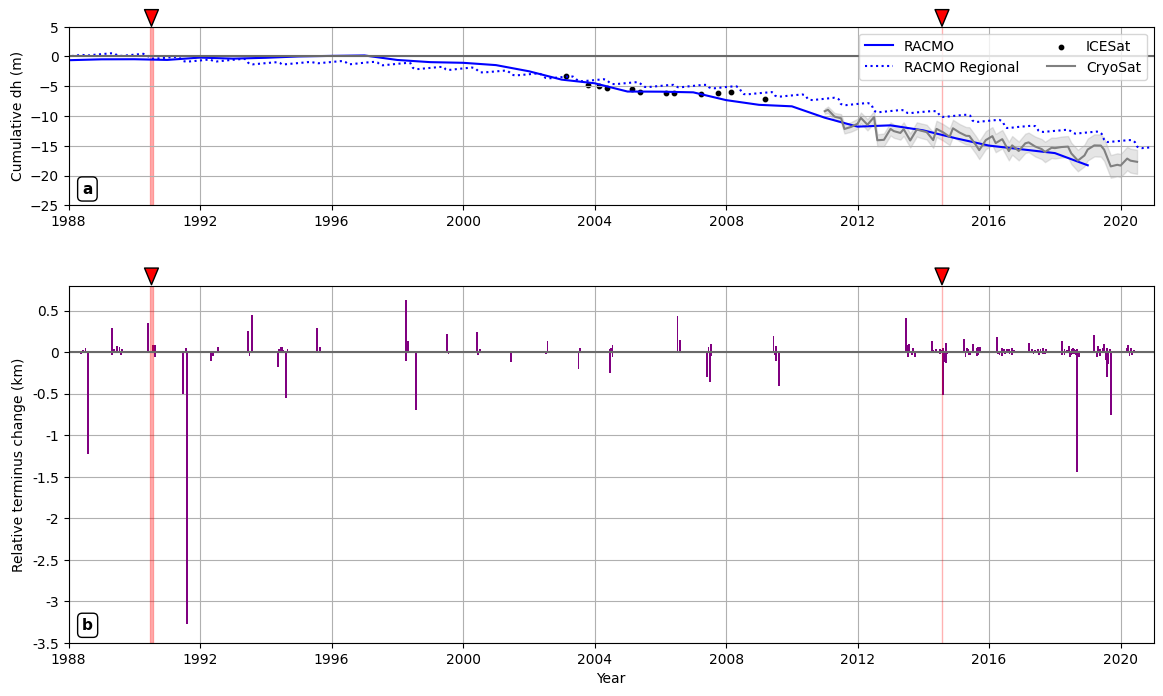

In [143]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Folder containing the CSV files
folder_path = "Data/dh"
terminus_file = "Data/dh/terminus_change.csv"

fig_labels = ['a', 'b']

# Define the drainage events
events = [
    {"start": datetime(1990, 6, 19), "end": datetime(1990, 8, 1), "label": "Event 1990"},
    {"start": datetime(2014, 7, 22), "end": datetime(2014, 8, 1), "label": "Event 2014"},
]

# Mapping filenames to plot labels
files = {
    "dh_RACMO.csv": "RACMO",
    "dh_RACMO_regional.csv": "RACMO Regional",
    "dh_ICESat.csv": "ICESat",
    "dh_CryoSat.csv": "CryoSat"
}

# Assign a distinct color for each dataset
colors = {
    "RACMO": "blue",
    "RACMO Regional": "blue",
    "ICESat": "black",
    "CryoSat": "gray"
}

# Create subplots with shared x-axis
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2], hspace=0.3)

# --- Main dh plot ---
ax1 = fig.add_subplot(gs[0])

for filename, label in files.items():
    filepath = os.path.join(folder_path, filename)
    df = pd.read_csv(filepath)

    x = df.iloc[:, 0]  # Decimal years
    x = [decimal_year_to_datetime(val) for val in x]
    y = df.iloc[:, 1]
    color = colors[label]

    if label == "ICESat":
        plt.scatter(x, y, label=label, color=color, s=10)
    else:
        if label == "RACMO Regional":
            plt.plot(x, y, label=label, color=color, linestyle='dotted')
        else:
            plt.plot(x, y, label=label, color=color)

    if 'Uncertainty' in df.columns:
        uncertainty = df['Uncertainty']
        ax1.fill_between(x, y - uncertainty, y + uncertainty, color=color, alpha=0.2)

ax1.axhline(0, color='dimgray', linewidth=1.5)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator(4))

ax1.set_ylabel('Cumulative dh (m)')
ax1.set_xlim(datetime(1988, 1, 1), datetime(2021, 1, 1))
ax1.set_ylim(-25, 5)
ax1.set_xticks(list(range(1988, 2022, 4)))
ax1.grid(True)
ax1.legend(loc='upper right', ncol=2)

# Drainage events on dh plot
for event in events:
    draw_bar(ax1, event["start"], event["end"])
    draw_red_arrow(ax1, event["start"], event["end"])

# Figure Label
ax1.text(datetime(1988, 6, 1), -21, fig_labels[0],
         fontsize=11, fontweight='bold', color='black', ha='left', va='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# --- Terminus change bar plot ---
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.set_axisbelow(True)
df_term = pd.read_csv(terminus_file)
x_term = df_term.iloc[:, 0]
x_term = [decimal_year_to_datetime(val) for val in x_term]
y_term = df_term.iloc[:, 1]

ax2.axhline(0, color='dimgray', linewidth=1.5)

ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: f'{int(val)}' if val == 0 else f'{val:g}'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.xaxis.set_major_locator(mdates.YearLocator(4))

ax2.bar(x_term, y_term, color='purple', width=timedelta(days=20))
ax2.set_xlabel('Year')
ax2.set_ylabel('Relative terminus change (km)')
ax2.grid(True)
ax2.set_xlim(datetime(1988, 1, 1), datetime(2021, 1, 1))
ax2.set_ylim(-3.5, 0.8)

# Drainage events on terminus plot
for event in events:
    draw_bar(ax2, event["start"], event["end"])
    draw_red_arrow(ax2, event["start"], event["end"])

# Figure label
ax2.text(datetime(1988, 6, 1), -3.2, fig_labels[1],
         fontsize=11, fontweight='bold', color='black', ha='left', va='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


plt.tight_layout()
plt.savefig("ExtendedData_FigS6.png", dpi=300)
plt.savefig("ExtendedData_FigS6.svg", format='svg', bbox_inches='tight')
plt.show()